# Índice
1. Importaciones
2. Preprocesamiento de Datos
3. Detección de Outliers
4. Selección de Predictores y Objetivos
5. Normalización y División de los Datos
6. Definición de Modelos y Optimización de Hiperparámetros
7. Entrenamiento y Evaluación de Modelos

## **Importaciones**

### Bibliotecas para manejo de datos y análisis exploratorio
- **Pandas**: Biblioteca utilizada para manipulación y análisis de datos estructurados, como tablas. Facilita tareas como lectura, limpieza y transformación de datos.
- **NumPy**: Herramienta para realizar cálculos numéricos de alto rendimiento, incluyendo manejo eficiente de arrays y operaciones matemáticas avanzadas.
- **Seaborn**: Biblioteca especializada en la visualización de datos estadísticos. Permite crear gráficos claros y atractivos que ayudan a entender patrones en los datos.
- **Matplotlib.pyplot**: Proporciona funciones para generar gráficos personalizados y detallados, muy útiles para análisis exploratorios.

### Preprocesamiento y escalado de datos
- **MinMaxScaler**: Técnica de normalización que ajusta los valores de las variables a un rango específico, generalmente entre 0 y 1. Esto es especialmente útil para algoritmos sensibles a la escala de los datos.

### División de datos y validación
- **Train-Test Split**: Método para dividir los datos en conjuntos de entrenamiento y prueba. Ayuda a evaluar el rendimiento de los modelos y evita problemas como el sobreajuste.
- **GridSearchCV**: Herramienta para buscar automáticamente los mejores hiperparámetros de un modelo mediante validación cruzada. Esto optimiza el desempeño de los algoritmos.

### Modelos de regresión
- **Regresión Lineal**: Modelo utilizado para capturar relaciones lineales entre variables independientes y dependientes.
- **Árbol de Decisión**: Modelo basado en una estructura jerárquica que divide los datos en subconjuntos según reglas simples, lo que permite capturar relaciones no lineales.
- **Random Forest**: Un algoritmo de ensamblado que combina múltiples árboles de decisión para mejorar la precisión y la estabilidad de las predicciones.
- **Gradient Boosting**: Técnica de aprendizaje en la que se entrenan modelos en secuencia, enfocándose en corregir los errores de los modelos anteriores.
- **SVR (Máquinas de Soporte Vectorial)**: Modelo que encuentra un hiperplano en un espacio de alta dimensión para realizar predicciones.
- **XGBoost**: Una implementación eficiente y rápida de Gradient Boosting, popular por su capacidad de manejar grandes conjuntos de datos y características complejas.
- **Regresión con Redes Neuronales**: Modelo basado en redes neuronales artificiales, útil para capturar patrones complejos y no lineales en los datos.

### Métricas de evaluación
- **Errores Absoluto y Cuadrático Medio**: Métricas para medir la diferencia entre los valores predichos y los valores reales. Se utilizan para evaluar la precisión de los modelos.
- **Varianza Explicada y Coeficiente de Determinación (R²)**: Métricas que indican qué tan bien un modelo explica la variabilidad de los datos.

### Estadística y control de calidad
- **Z-Score**: Método estadístico que mide cuántos desvíos estándar se encuentra un valor respecto a la media. Ayuda a detectar valores atípicos.

### Configuración adicional
- **Warnings**: Se desactivan las advertencias para evitar mensajes innecesarios durante la ejecución, lo que hace que el flujo de trabajo sea más limpio.


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

## **Preprocesamiento de datos**

### Carga inicial de los datos
- Se cargan los datos desde un archivo CSV utilizando la función `read_csv` de Pandas. 
- El delimitador utilizado en el archivo es el punto y coma (`;`), ya que es común en ciertos formatos de datos internacionales.

### Conversión de valores numéricos
- Se identifican columnas específicas con valores numéricos que están representados con comas (`','`) en lugar de puntos (`'.'`).
- Se reemplazan las comas por puntos y las columnas se convierten al tipo `float` para su correcto manejo en operaciones matemáticas y análisis.

### Conversión de valores flotantes a enteros
- Se revisan las columnas numéricas para verificar si contienen únicamente valores enteros. Si no hay decimales (es decir, si los valores son múltiplos exactos de 1), estas columnas se convierten al tipo `Int64` para optimizar el uso de memoria y mejorar la claridad.

### Configuración de formato en Pandas
- Se establece una configuración global para que los números flotantes no muestren decimales en las salidas de Pandas. Esto mejora la legibilidad cuando los valores no necesitan decimales.

### Eliminación de columnas innecesarias
- Se eliminan columnas irrelevantes para el análisis, como aquellas que no aportan información útil (por ejemplo, columnas con valores vacíos o relacionadas con fechas y tiempos si no son necesarias).
- La opción `errors='ignore'` garantiza que el código no falle si alguna columna especificada ya no está presente en el conjunto de datos.

Este proceso garantiza que los datos estén en un formato limpio, consistente y adecuado para el análisis posterior.


In [18]:
# Cargar los datos
df = pd.read_csv('data/AirQuality.csv', delimiter=';')

# Reemplazar comas por puntos y convertir columnas a float
columns_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.', regex=False).astype(float)

# Convertir todas las columnas numéricas a enteros si no tienen decimales
for col in df.select_dtypes(include=['float', 'int']).columns:
    if df[col].dropna().mod(1).eq(0).all():  # Verifica si todos los valores son enteros
        df[col] = df[col].astype('Int64')  # Convierte a entero compatible con NaN

# Configuración para que no muestre decimales en pandas
pd.set_option('display.float_format', '{:.0f}'.format)

# Eliminar columnas innecesarias
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Time','Date'], errors='ignore')

## **Manejo de valores nulos**

### Contar valores nulos antes de la eliminación
- Antes de realizar cualquier operación de limpieza, se cuenta la cantidad de valores nulos (`NaN`) presentes en cada columna del conjunto de datos.
- Esto proporciona una visión general del estado inicial del dataset y ayuda a decidir las estrategias de limpieza necesarias.

### Eliminación de filas completamente nulas
- Se eliminan todas las filas donde **todos los valores**, incluyendo el índice, sean nulos.
- Este enfoque asegura que las filas vacías no interfieran con el análisis y procesamiento de los datos.

### Contar valores nulos después de la eliminación
- Tras la eliminación de filas completamente nulas, se realiza un nuevo conteo de valores nulos en cada columna para verificar los cambios en el conjunto de datos.
- Este paso permite validar que la operación de limpieza se realizó correctamente.

### Información sobre el estado del dataset limpio
- **Tipos de datos**: Se revisan los tipos de datos de cada columna después de la limpieza para garantizar que son apropiados para el análisis posterior.
- **Primeros registros**: Se imprimen los primeros registros del dataset limpio para confirmar visualmente que los datos restantes están en un formato adecuado.

Este procedimiento es esencial para garantizar que los datos sean consistentes y estén listos para las siguientes etapas del análisis o modelado.


In [19]:
# Contar valores nulos antes de la eliminación
valores_nulos = df.isna().sum()
print("Valores nulos antes de la eliminación:")
print(valores_nulos)

# Eliminar filas donde todos los valores, incluyendo el índice, sean NaN
df_cleaned = df.dropna()

# Contar valores nulos después de la eliminación
valores_nulos_despues = df_cleaned.isna().sum()
print("\nValores nulos después de la eliminación:")
print(valores_nulos_despues)

# Mostrar información y primeros registros
print("\nTipos de datos después de la limpieza:")
print(df_cleaned.dtypes)
print("\nPrimeros registros después de la limpieza:")
print(df_cleaned.head())

Valores nulos antes de la eliminación:
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Valores nulos después de la eliminación:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Tipos de datos después de la limpieza:
CO(GT)           float64
PT08.S1(CO)        Int64
NMHC(GT)           Int64
C6H6(GT)         float64
PT08.S2(NMHC)      Int64
NOx(GT)            Int64
PT08.S3(NOx)       Int64
NO2(GT)            Int64
PT08.S4(NO2)       Int64
PT08.S5(O3)        Int64
T                float64
RH               float64
AH               float64
dtype: o

## **Matriz de Correlación**

La matriz de correlación se utiliza para identificar relaciones lineales entre las variables del conjunto de datos. Es una herramienta clave para:
- Detectar patrones en los datos.
- Identificar variables altamente correlacionadas que pueden ser redundantes o aportar información relevante para el modelado.
- Ayuda a seleccionar características relevantes para el modelado al identificar variables que están altamente correlacionadas con el objetivo.
- Permite detectar posibles problemas de multicolinealidad cuando dos o más variables independientes están altamente correlacionadas entre sí.

### Pasos
1. **Tamaño de la figura**:
   - Se configura un tamaño específico para la visualización (12 x 10 pulgadas) para garantizar que todos los valores y etiquetas sean legibles.

2. **Heatmap de correlación**:
   - Se utiliza `sns.heatmap` para crear un mapa de calor que visualiza las correlaciones entre todas las variables numéricas del dataset.
   - Las correlaciones se calculan con el método de Pearson, que mide la relación lineal entre dos variables.

3. **Anotaciones**:
   - Los valores de correlación se anotan directamente en el mapa para facilitar su interpretación. 
   - El formato se ajusta a dos decimales (`fmt=".2f"`) para mayor claridad.

4. **Colores del mapa**:
    La matriz de correlación muestra las relaciones lineales entre las diferentes variables del conjunto de datos. Los valores de correlación oscilan entre -1 y 1:
    - **1**: Correlación positiva perfecta.
    - **0**: Sin correlación.
    - **-1**: Correlación negativa perfecta.

    Los colores en el mapa de calor ayudan a interpretar visualmente la intensidad y la dirección de las relaciones:
    - **Azul intenso**: Indica una fuerte correlación negativa.
    - **Rojo intenso**: Indica una fuerte correlación positiva.
    - **Blanco**: Representa poca o ninguna correlación.

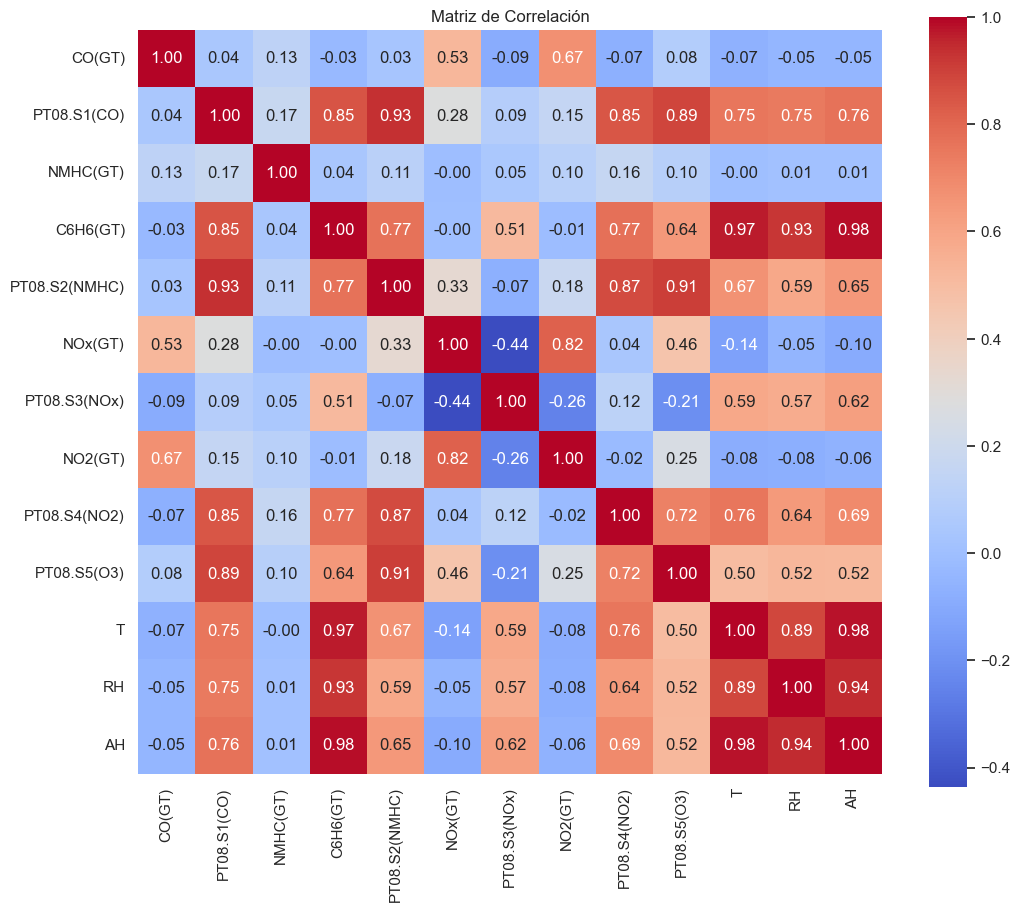

In [20]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()

## **Detección de Outliers con el Rango Intercuartílico (IQR)**
Los valores atípicos (outliers) son puntos de datos que se desvían significativamente del resto de las observaciones en un conjunto de datos. Detectarlos es crucial, ya que pueden afectar la precisión de los modelos predictivos y distorsionar los análisis estadísticos.

Este análisis utiliza el rango intercuartílico (IQR) para identificar valores atípicos. El IQR es la diferencia entre el tercer cuartil (Q3, el 75%) y el primer cuartil (Q1, el 25%), lo que representa el rango central de los datos.

   - Para cada columna numérica:
     - Se calcula el primer cuartil (Q1, 25%) y el tercer cuartil (Q3, 75%).
     - Se calcula el rango intercuartílico (IQR) como la diferencia entre Q3 y Q1.
     - Se determinan los límites inferior y superior para identificar outliers:
       - **Límite inferior**: Q1 - 1.5 × IQR.
       - **Límite superior**: Q3 + 1.5 × IQR.
     - Los valores que están fuera de estos límites se consideran outliers.
     - Se reporta la cantidad de valores atípicos.
     - Se muestran los límites inferior y superior que definen qué se considera outlier.

### Resultados
- **Cantidad de outliers**: Informa cuántos valores en una columna exceden los límites definidos.
- **Límites inferior y superior**: Ayudan a entender el rango aceptable de valores para cada columna, con base en su distribución.

### Consideraciones del enfoque basado en IQR
- Es importante revisar manualmente los valores detectados como outliers, ya que en algunos contextos estos pueden ser válidos y relevantes.
- Se descarta este tratamiento por la detección de muchos outliers y el siguiente paso será probar con z-score. 

In [21]:
# Definir una función para detectar outliers usando el rango intercuartílico (IQR)
def detectar_outliers(df, columnas):
    outliers_info = {}
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil (25%)
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil (75%)
        IQR = Q3 - Q1  # Rango intercuartílico

        # Límites para identificar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar valores fuera de los límites
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        outliers_info[columna] = {
            "Cantidad de outliers": len(outliers),
            "Límite inferior": limite_inferior,
            "Límite superior": limite_superior
        }
    return outliers_info

# Aplicar la función a las columnas numéricas de tu DataFrame
columnas_numericas = df.select_dtypes(include=[np.number]).columns
outliers = detectar_outliers(df, columnas_numericas)

# Mostrar resultados
for columna, info in outliers.items():
    print(f"Columna: {columna}")
    print(f" - Cantidad de outliers: {info['Cantidad de outliers']}")
    print(f" - Límite inferior: {info['Límite inferior']}")
    print(f" - Límite superior: {info['Límite superior']}")
    print()

Columna: CO(GT)
 - Cantidad de outliers: 1898
 - Límite inferior: -2.4
 - Límite superior: 5.6

Columna: PT08.S1(CO)
 - Cantidad de outliers: 484
 - Límite inferior: 471.0
 - Límite superior: 1671.0

Columna: NMHC(GT)
 - Cantidad de outliers: 914
 - Límite inferior: -200.0
 - Límite superior: -200.0

Columna: C6H6(GT)
 - Cantidad de outliers: 606
 - Límite inferior: -10.399999999999999
 - Límite superior: 28.0

Columna: PT08.S2(NMHC)
 - Cantidad de outliers: 426
 - Límite inferior: 120.0
 - Límite superior: 1696.0

Columna: NOx(GT)
 - Cantidad de outliers: 509
 - Límite inferior: -301.0
 - Límite superior: 635.0

Columna: PT08.S3(NOx)
 - Cantidad de outliers: 602
 - Límite inferior: 152.5
 - Límite superior: 1444.5

Columna: NO2(GT)
 - Cantidad de outliers: 1696
 - Límite inferior: -67.0
 - Límite superior: 253.0

Columna: PT08.S4(NO2)
 - Cantidad de outliers: 450
 - Límite inferior: 469.5
 - Límite superior: 2377.5

Columna: PT08.S5(O3)
 - Cantidad de outliers: 458
 - Límite inferior:

## **Detección y eliminación de outliers utilizando Z-scores**
El método basado en Z-scores se utiliza para identificar valores atípicos (outliers) en un conjunto de datos. Un Z-score mide cuántas desviaciones estándar está un valor por encima o por debajo de la media de la distribución. Valores con un Z-score alto (por ejemplo, mayor a 5) son considerados outliers.

### Proceso
1. **Selección de columnas numéricas**:
   - Se seleccionan únicamente las columnas de tipo numérico (`float64` e `int64`) para aplicar el análisis, ya que los Z-scores no son aplicables a datos categóricos o no numéricos.

2. **Manejo de valores nulos**:
   - Se eliminan las filas que contienen valores nulos en las columnas numéricas seleccionadas. Esto asegura que el cálculo de Z-scores no se vea afectado por valores faltantes.

3. **Conversión de tipos numéricos**:
   - Se convierten todas las columnas numéricas al tipo `float` para garantizar que no haya errores durante el cálculo de los Z-scores.

4. **Cálculo de Z-scores**:
   - Se calcula el Z-score absoluto para cada valor en las columnas numéricas, utilizando la fórmula:
     \[
     Z = \frac{(x - \mu)}{\sigma}
     \]
     donde \( \mu \) es la media y \( \sigma \) es la desviación estándar.

5. **Definición del umbral para outliers**:
   - Se define un umbral de **5** para considerar un valor como atípico. Los valores con un Z-score absoluto mayor o igual a 5 se consideran outliers.

6. **Filtro de datos**:
   - Se crea un filtro para eliminar filas donde al menos una columna tiene un Z-score mayor o igual al umbral.
   - Las filas que cumplen con la condición (Z-scores menores a 5 en todas las columnas) se conservan en el nuevo DataFrame.

7. **Visualización de resultados**:
   - Se compara el número de filas y columnas del DataFrame antes y después de la eliminación de outliers.
   - Se muestran las primeras filas y un resumen estadístico del nuevo DataFrame limpio (`describe()`).

### Beneficios y Consideraciones del método Z-score
- Es una técnica robusta y fácil de implementar para identificar valores atípicos en variables numéricas.
- Permite eliminar filas con outliers de manera eficiente, mejorando la calidad del conjunto de datos para análisis posteriores.

In [22]:
# Seleccionar columnas estrictamente numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Verificar que no hay valores nulos en las columnas seleccionadas
df = df.dropna(subset=columnas_numericas)

# Convertir todas las columnas numéricas a float para evitar errores con zscore
df[columnas_numericas] = df[columnas_numericas].astype(float)

# Calcular Z-scores para las columnas numéricas
zscores = np.abs(zscore(df[columnas_numericas]))

# Crear un filtro para las filas donde todos los Z-scores son menores que el umbral (5)
filtro = (zscores < 5).all(axis=1)

# Crear un nuevo DataFrame eliminando las filas que tienen outliers
df_sin_outliers = df[filtro]

# Mostrar información del DataFrame limpio
print("Antes de eliminar outliers:")
print(f"Filas: {len(df)}, Columnas: {len(df.columns)}")

print("\nDespués de eliminar outliers:")
print(f"Filas: {len(df_sin_outliers)}, Columnas: {len(df_sin_outliers.columns)}")

# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame sin outliers:")
print(df_sin_outliers.head())

print(df_sin_outliers.describe())

Antes de eliminar outliers:
Filas: 9357, Columnas: 13

Después de eliminar outliers:
Filas: 9270, Columnas: 13

Primeras filas del DataFrame sin outliers:
   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0       3         1360       150        12           1046      166   
1       2         1292       112         9            955      103   
2       2         1402        88         9            939      131   
3       2         1376        80         9            948      172   
4       2         1272        51         6            836      131   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  T  RH  AH  
0          1056      113          1692         1268 14  49   1  
1          1174       92          1559          972 13  48   1  
2          1140      114          1555         1074 12  54   1  
3          1092      122          1584         1203 11  60   1  
4          1205      116          1490         1110 11  60   1  
       CO(GT)  PT08.S1(CO)  NMHC(G

# Definición de predictores y objetivos
En este paso, se seleccionan las variables predictoras (input) y las variables objetivo (output) para el análisis y modelado. Esta separación es esencial para entrenar modelos de aprendizaje automático, ya que define las entradas y salidas del sistema.

## Proceso
1. **Definir predictores (variables independientes)**:
   - Se seleccionan las columnas que representan las características que se usarán para predecir los valores objetivo.
   - En este caso, se han elegido:
     - `T` (Temperatura): Variable ambiental que puede influir en los niveles de contaminantes.
     - `RH` (Humedad Relativa): Indicador de la cantidad de vapor de agua presente en el aire.
     - `AH` (Humedad Absoluta): Relación directa con la densidad de vapor de agua en el aire.

2. **Definir objetivos (variables dependientes)**:
   - Se seleccionan las columnas que representan los valores que se desea predecir:
     - `PT08.S1(CO)`: Indicador de dióxido de carbono.
     - `PT08.S2(NMHC)`: Hidrocarburos no metánicos.
     - `PT08.S3(NOx)`: Óxidos de nitrógeno.
     - `PT08.S4(NO2)`: Dióxido de nitrógeno.

3. **Separación de los datos**:
   - `X` contiene las variables predictoras.
   - `y` contiene las variables objetivo.

4. **Visualización de los datos**:
   - Se muestran las primeras 5 filas del DataFrame limpio para verificar que las columnas seleccionadas están correctamente separadas y listas para el análisis.

## Variables seleccionadas
- Las variables predictoras (`T`, `RH`, `AH`) están relacionadas con las condiciones climáticas y pueden influir directamente en la concentración de contaminantes.
- Las variables objetivo (`PT08.S1(CO)`, `PT08.S2(NMHC)`, etc.) son métricas clave relacionadas con la calidad del aire, cuya predicción es el objetivo principal del proyecto.

In [23]:
# Definir predictores y objetivos
predictors = ['T', 'RH', 'AH']
targets = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']

X = df_sin_outliers[predictors]
y = df_sin_outliers[targets]
df_sin_outliers.head(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3,1360,150,12,1046,166,1056,113,1692,1268,14,49,1
1,2,1292,112,9,955,103,1174,92,1559,972,13,48,1
2,2,1402,88,9,939,131,1140,114,1555,1074,12,54,1
3,2,1376,80,9,948,172,1092,122,1584,1203,11,60,1
4,2,1272,51,6,836,131,1205,116,1490,1110,11,60,1


# Normalización y división de datos
La normalización y la división del conjunto de datos son pasos cruciales en el preprocesamiento para garantizar que los modelos de aprendizaje automático funcionen de manera óptima.

## Proceso

### **1. Normalización de los datos**
- Se utiliza la técnica de **normalización** para escalar los valores de las variables predictoras (`X`) al rango [0, 1].
- Esto se logra mediante el `MinMaxScaler`, que transforma los datos según la fórmula:
  \[
  X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  \]
- **Razón para normalizar**:
  - Los algoritmos como la regresión logística, máquinas de soporte vectorial (SVM) o redes neuronales son sensibles a la escala de las variables.
  - Asegura que todas las variables tengan un peso proporcional en el entrenamiento del modelo.

### **2. División del conjunto de datos**
- Se divide el conjunto de datos normalizado en dos partes:
  - **Conjunto de entrenamiento** (`X_train`, `y_train`): Utilizado para entrenar el modelo.
  - **Conjunto de prueba** (`X_test`, `y_test`): Utilizado para evaluar el rendimiento del modelo en datos no vistos.
- El tamaño del conjunto de prueba es del 20% del total, definido por el parámetro `test_size=0.2`.
- Se fija una semilla aleatoria (`random_state=42`) para garantizar que la división sea reproducible.

## Beneficios y Consideraciones de estos pasos

1. **Normalización**:
   - Mejora la estabilidad y la velocidad de convergencia de los modelos.
   - Reduce el sesgo hacia variables con valores mayores, ya que todos los predictores tienen el mismo rango de escala.

2. **División del conjunto de datos**:
   - Permite evaluar la capacidad del modelo para generalizar a datos nuevos.
   - Asegura que el modelo no esté sobreajustado al conjunto de entrenamiento.
- Es importante aplicar la misma normalización al conjunto de prueba que se utilizó en el conjunto de entrenamiento para evitar inconsistencias.
- Evaluar si el rango de los valores después de la normalización es el adecuado para el modelo seleccionado.

In [24]:
# normalización
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Separar datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definición de modelos y búsqueda de hiperparámetros
En este paso, se definen diferentes modelos de regresión y sus hiperparámetros para realizar una búsqueda de los mejores valores que optimicen su desempeño. Cada modelo tiene una estructura diferente y, por lo tanto, requiere configuraciones específicas.

## Modelos incluidos
A continuación, se describen los modelos definidos y los hiperparámetros que serán evaluados:

### **1. Regresión Lineal**
- **Modelo**: Una técnica simple y eficiente que asume una relación lineal entre las variables predictoras y el objetivo.
- **Hiperparámetros**: Ninguno, ya que es un modelo parametrizado que no requiere ajustes adicionales.

### **2. Árbol de Decisión**
- **Modelo**: Divide iterativamente el conjunto de datos en ramas basadas en las características más informativas.
- **Hiperparámetros**:
  - `max_depth`: Profundidad máxima del árbol (None para sin límite, o valores específicos como 10, 20, 30).
  - `min_samples_split`: Mínimo número de muestras necesarias para dividir un nodo (valores: 2, 5, 10).

### **3. Random Forest**
- **Modelo**: Conjunto de múltiples árboles de decisión, donde cada árbol contribuye a la predicción final mediante votación o promedio.
- **Hiperparámetros**:
  - `n_estimators`: Número de árboles en el bosque (valores: 50, 100, 200).
  - `max_depth`: Profundidad máxima de los árboles.
  - `min_samples_split`: Mínimo número de muestras para dividir un nodo.

### **4. Gradient Boosting**
- **Modelo**: Método de ensamble que entrena modelos secuenciales, donde cada modelo corrige los errores del anterior.
- **Hiperparámetros**:
  - `n_estimators`: Número de iteraciones de boosting.
  - `learning_rate`: Tasa de aprendizaje (valores: 0.01, 0.1, 0.2).
  - `max_depth`: Profundidad máxima de los árboles.

### **5. Support Vector Regressor (SVR)**
- **Modelo**: Encuentra un hiperplano en un espacio de alta dimensión que minimiza el error dentro de un margen aceptable.
- **Hiperparámetros**:
  - `C`: Parámetro de regularización (valores: 0.1, 1, 10).
  - `kernel`: Tipo de núcleo utilizado en el algoritmo (valores: 'linear', 'rbf').
  - `epsilon`: Margen de tolerancia para errores.

### **6. XGBoost**
- **Modelo**: Implementación eficiente de Gradient Boosting que maneja características complejas y grandes volúmenes de datos.
- **Hiperparámetros**:
  - `n_estimators`: Número de árboles en el modelo.
  - `learning_rate`: Tasa de aprendizaje.
  - `max_depth`: Profundidad máxima de los árboles.
  - `subsample`: Proporción de muestras utilizadas en cada iteración.

### **7. Red Neuronal**
- **Modelo**: Redes neuronales multicapa que aprenden patrones complejos en los datos.
- **Hiperparámetros**:
  - `hidden_layer_sizes`: Tamaño de las capas ocultas (por ejemplo, 50 neuronas en una capa o 50 en dos capas).
  - `activation`: Función de activación (por ejemplo, ReLU o tangente hiperbólica).
  - `solver`: Optimizadores utilizados para el entrenamiento (adam o sgd).
  - `learning_rate`: Estrategia para ajustar la tasa de aprendizaje (constante o adaptativa).


In [25]:
# Definir modelos y sus hiperparámetros
param_grids = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'epsilon': [0.01, 0.1, 1]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    },
    'Neural Network': {
        'model': MLPRegressor(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'learning_rate': ['constant', 'adaptive']
        }
    }
}

results = {}


# Entrenamiento, optimización de hiperparámetros y evaluación de modelos

Este código entrena y evalúa diferentes modelos de regresión para cada variable objetivo definida. Utiliza `GridSearchCV` para optimizar hiperparámetros y selecciona el mejor modelo basado en su desempeño en el conjunto de prueba.

## Proceso
### **1. Definir función para calcular métricas**
Se crea una función llamada `calcular_metricas` que calcula las siguientes métricas clave:
- **MAE (Mean Absolute Error)**: Mide el error promedio absoluto entre las predicciones y los valores reales.
- **MSE (Mean Squared Error)**: Penaliza los errores grandes al elevarlos al cuadrado.
- **RMSE (Root Mean Squared Error)**: Proporciona una métrica interpretable en las mismas unidades que la variable objetivo.
- **R² (Coeficiente de Determinación)**: Indica qué tan bien el modelo explica la variabilidad de los datos.
- **Varianza explicada**: Proporciona una métrica adicional para evaluar la calidad de las predicciones.

### **2. Iterar sobre las variables objetivo**
- Para cada variable objetivo en `targets`, se realiza lo siguiente:
  - Se seleccionan los datos de entrenamiento y prueba correspondientes a esa variable objetivo.
  - Se inicializan variables para rastrear el mejor modelo, sus hiperparámetros y el mejor \( R² \) obtenido en el conjunto de prueba.

### **3. Entrenar y optimizar modelos**
- Para cada modelo definido en `param_grids`:
  - **Optimización con GridSearchCV**:
    - Se configura `GridSearchCV` con validación cruzada de 5 pliegues para encontrar la mejor combinación de hiperparámetros.
    - Se utiliza la métrica `neg_mean_squared_error` como criterio de optimización.
  - **Entrenamiento y predicción**:
    - El mejor modelo encontrado se entrena en el conjunto de entrenamiento y realiza predicciones sobre los conjuntos de entrenamiento y prueba.
  - **Cálculo de métricas**:
    - Se calculan las métricas para los conjuntos de entrenamiento y prueba utilizando la función `calcular_metricas`.
  - **Comparación de modelos**:
    - Se compara el \( R² \) del modelo en el conjunto de prueba con el mejor \( R² \) encontrado hasta ahora. Si es mejor, se actualiza el modelo óptimo.

### **4. Guardar resultados**
- Para cada variable objetivo, se guarda:
  - El mejor modelo identificado.
  - El \( R² \) obtenido en el conjunto de prueba.
  - Los hiperparámetros óptimos.

## Beneficios
1. **Optimización automática**:
   - `GridSearchCV` busca sistemáticamente la mejor configuración de hiperparámetros.
2. **Evaluación detallada**:
   - Se calculan múltiples métricas para evaluar exhaustivamente el rendimiento de cada modelo.
3. **Comparación transparente**:
   - Los resultados permiten comparar diferentes algoritmos y seleccionar el más adecuado.



In [26]:
# Definir función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    varianza_explicada = explained_variance_score(y_true, y_pred)
    
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
        "Varianza explicada": varianza_explicada
    }
# Entrenar y evaluar cada modelo por variable objetivo
best_models = {}
results = {}

for target in targets:
    print(f"\nOptimización de hiperparámetros para el objetivo: {target}")
    y_train_target = y_train[target]
    y_test_target = y_test[target]

    results[target] = {}
    best_model_name = None
    best_r2_test = -np.inf
    best_hyperparameters = None

    for name, config in param_grids.items():
        model = config['model']
        params = config['params']
        
        # Configurar GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train_target)
        
        # Mejor modelo y evaluación
        best_model = grid_search.best_estimator_
        
        # Predicciones en entrenamiento y prueba
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        # Calcular métricas
        metricas_train = calcular_metricas(y_train_target, y_train_pred)
        metricas_test = calcular_metricas(y_test_target, y_test_pred)
        
        # Guardar resultados
        results[target][name] = {
            "Best Params": grid_search.best_params_,
            "Metrics Train": metricas_train,
            "Metrics Test": metricas_test,
        }
        
        # Verificar si es el mejor modelo según R² de prueba
        if metricas_test["R²"] > best_r2_test:
            best_r2_test = metricas_test["R²"]
            best_model_name = name
            best_hyperparameters = grid_search.best_params_
        
        # Imprimir métricas calculadas para el conjunto de prueba
        print(f"{name} para {target}:")
        print(f"  MAE Test: {metricas_test['MAE']:.4f}")
        print(f"  MSE Test: {metricas_test['MSE']:.4f}")
        print(f"  RMSE Test: {metricas_test['RMSE']:.4f}")
        print(f"  R² Test: {metricas_test['R²']:.4f}")
        print(f"  Varianza Explicada Test: {metricas_test['Varianza explicada']:.4f}")
        print(f"  Mejores hiperparámetros: {grid_search.best_params_}\n")

    # Guardar el mejor modelo y sus hiperparámetros para este objetivo
    best_models[target] = {
        "Model Name": best_model_name,
        "R² Test": best_r2_test,
        "Best Params": best_hyperparameters
    }



Optimización de hiperparámetros para el objetivo: PT08.S1(CO)
Linear Regression para PT08.S1(CO):
  MAE Test: 161.4594
  MSE Test: 42705.4774
  RMSE Test: 206.6530
  R² Test: 0.5888
  Varianza Explicada Test: 0.5889
  Mejores hiperparámetros: {}

Decision Tree para PT08.S1(CO):
  MAE Test: 160.6029
  MSE Test: 44626.1445
  RMSE Test: 211.2490
  R² Test: 0.5703
  Varianza Explicada Test: 0.5704
  Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 5}

Random Forest para PT08.S1(CO):
  MAE Test: 154.1183
  MSE Test: 40054.8410
  RMSE Test: 200.1371
  R² Test: 0.6143
  Varianza Explicada Test: 0.6144
  Mejores hiperparámetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Gradient Boosting para PT08.S1(CO):
  MAE Test: 156.1042
  MSE Test: 40836.7112
  RMSE Test: 202.0810
  R² Test: 0.6068
  Varianza Explicada Test: 0.6069
  Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

Support Vector Regressor para PT08.S1(CO):
  MAE T

# Mejores modelos para cada contaminante

Resumen con los mejores modelos seleccionados para predecir cada una de las variables objetivo. La selección se basa en el rendimiento de los modelos evaluados, específicamente en la métrica \( R² \) obtenida en el conjunto de prueba.

## Pasos del proceso
1. **Iterar sobre los contaminantes**:
   - Se recorre el diccionario `best_models`, que contiene información sobre los mejores modelos seleccionados para cada contaminante.
   - Cada clave del diccionario representa una variable objetivo (por ejemplo, `PT08.S1(CO)`, `PT08.S2(NMHC)`), mientras que los valores contienen información sobre el modelo óptimo.

2. **Mostrar resultados**:
   - Se imprime una lista en la que cada elemento incluye:
     - El nombre de la variable objetivo.
     - El nombre del modelo que obtuvo el mejor rendimiento.

## Beneficios
- **Visualización clara**: Permite ver rápidamente cuál modelo fue más efectivo para cada contaminante.
- **Facilidad de análisis**: Ayuda a comparar los resultados entre diferentes variables objetivo y evaluar el rendimiento global del sistema.

In [27]:
# Mostrar los mejores modelos para cada contaminante
print("\nResumen de los mejores modelos por contaminante:")
for target, model_name in best_models.items():
    print(f"- {target}: {model_name}")


Resumen de los mejores modelos por contaminante:
- PT08.S1(CO): {'Model Name': 'Random Forest', 'R² Test': 0.6143491878510134, 'Best Params': {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}}
- PT08.S2(NMHC): {'Model Name': 'XGBoost', 'R² Test': 0.45965096643543846, 'Best Params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}}
- PT08.S3(NOx): {'Model Name': 'XGBoost', 'R² Test': 0.4536281467171671, 'Best Params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}}
- PT08.S4(NO2): {'Model Name': 'XGBoost', 'R² Test': 0.7384094216282417, 'Best Params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}}


## **Evaluación y comparación de modelos**
Convertir los resultados del entrenamiento de los modelos en un DataFrame para facilitar su análisis y los visualizarlos mediante gráficos que destacan las métricas de rendimiento, el nivel de sobreajuste y la comparación entre modelos.

#### 1. Conversión de resultados a DataFrame
- Los resultados del entrenamiento y evaluación de los modelos (almacenados en `results`) se organizan en un DataFrame.
- Para cada modelo y cada variable objetivo, se almacenan las siguientes métricas:
  - **MSE (Mean Squared Error)**: Tanto para los conjuntos de entrenamiento como de prueba.
  - **MAE (Mean Absolute Error)**: Tanto para los conjuntos de entrenamiento como de prueba.
  - **R²**: Coeficiente de determinación para los conjuntos de entrenamiento y prueba.
  - **Sobreajuste**: Diferencia entre \( R² \) en entrenamiento y prueba, indicando si el modelo está sobreajustado.
  - **Mejores hiperparámetros**: Los parámetros óptimos encontrados durante la optimización.

#### 2. Visualización de métricas

##### 2.1. Comparación de \( R² \) (prueba)
- Se crea un gráfico de barras que muestra el \( R² \) en el conjunto de prueba para cada modelo y cada variable objetivo.
- **Objetivo**: Identificar qué modelos explican mejor la variabilidad de los datos para cada contaminante.

##### 2.2. Comparación de MSE (prueba)
- Otro gráfico de barras muestra el MSE en el conjunto de prueba para cada modelo y contaminante.
- **Objetivo**: Comparar los errores promedio al cuadrado, resaltando qué modelos son más precisos.

##### 2.3. Análisis de sobreajuste
- Un tercer gráfico de barras ilustra la diferencia entre el \( R² \) de entrenamiento y el \( R² \) de prueba.
- **Objetivo**: Evaluar el grado de sobreajuste de cada modelo para cada contaminante:
  - Valores más cercanos a 0 indican que el modelo generaliza bien.
  - Valores positivos grandes indican un sobreajuste significativo.

- Tres gráficos que permiten interpretar visualmente:
  1. Qué modelos son más efectivos para predecir cada contaminante.
  2. El nivel de error promedio (MSE) en los conjuntos de prueba.
  3. La capacidad de los modelos para generalizar (sobreajuste).

### Beneficios y Consideraciones
- **Visualización clara**: Los gráficos facilitan la comparación de modelos y variables objetivo.
- **Análisis detallado**: El cálculo del sobreajuste proporciona información clave sobre la capacidad de generalización de los modelos.
- **Identificación de patrones**: Ayuda a seleccionar los modelos más robustos para cada contaminante.
- **Escala del MSE**: Si las variables objetivo tienen diferentes escalas, podría ser necesario normalizar las métricas para una comparación más justa.
- **Personalización de gráficos**: Ajustar colores, etiquetas o tamaños según las necesidades específicas del análisis.


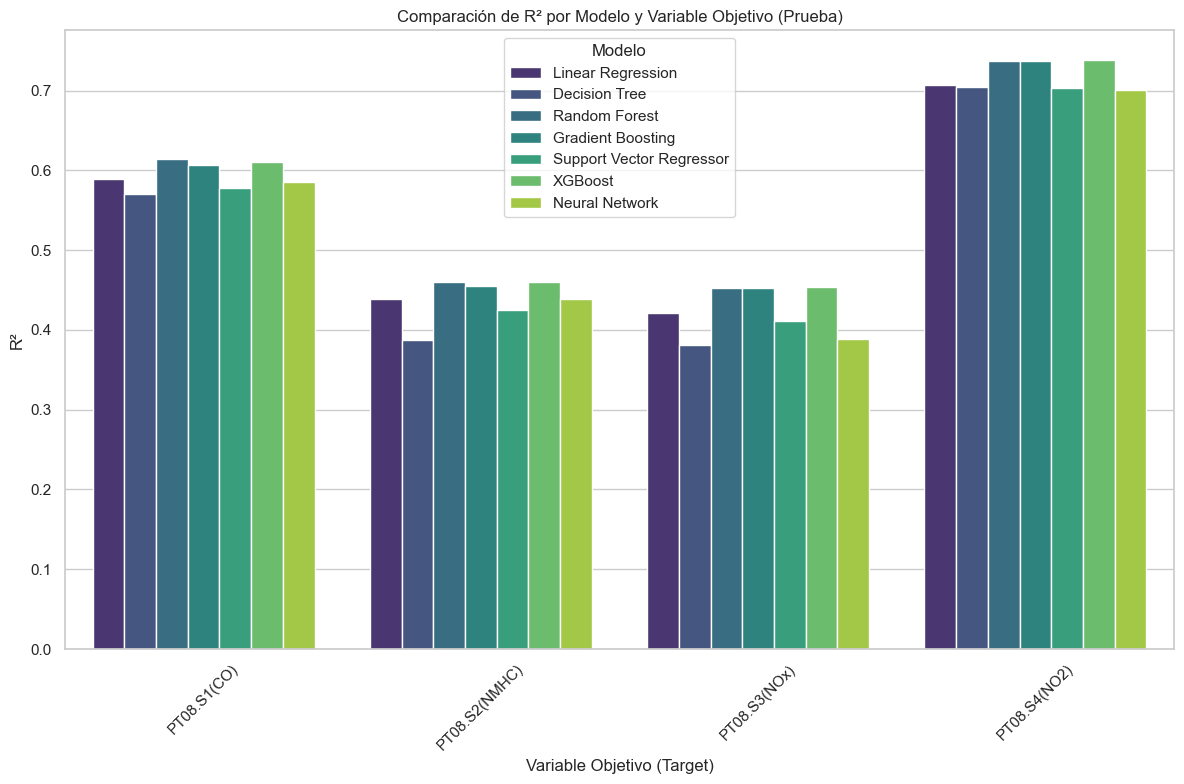

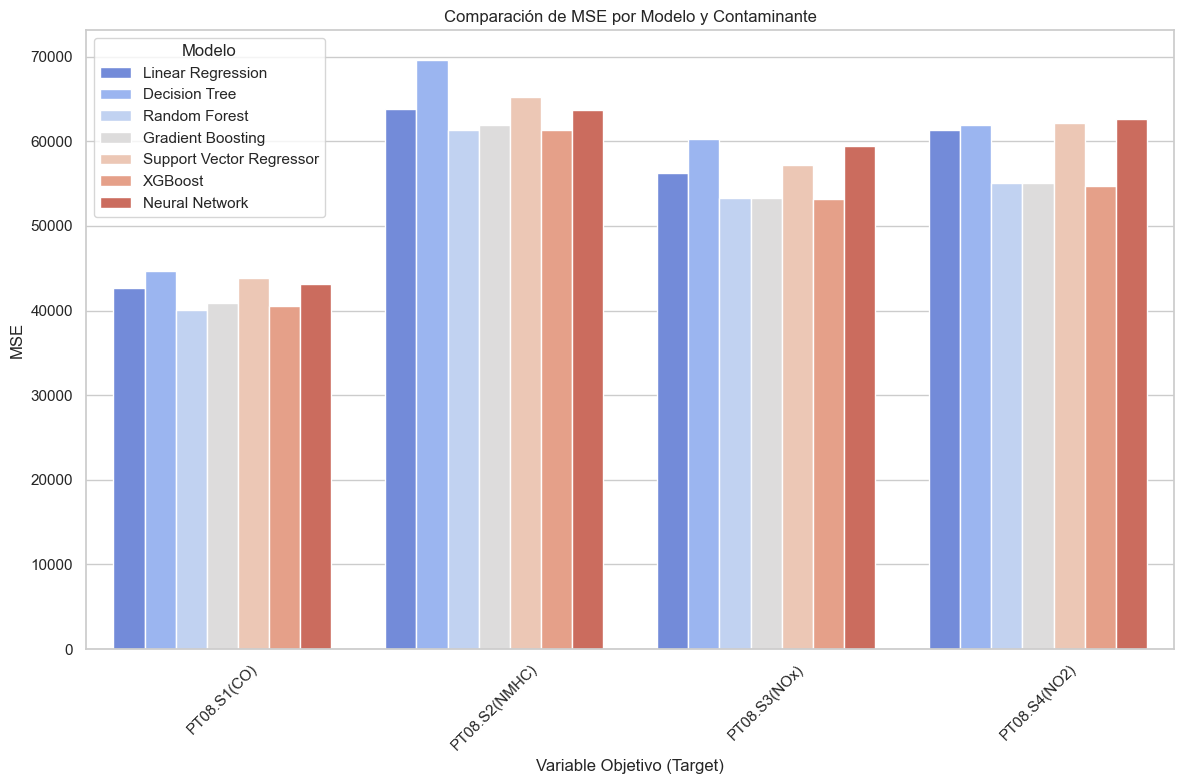

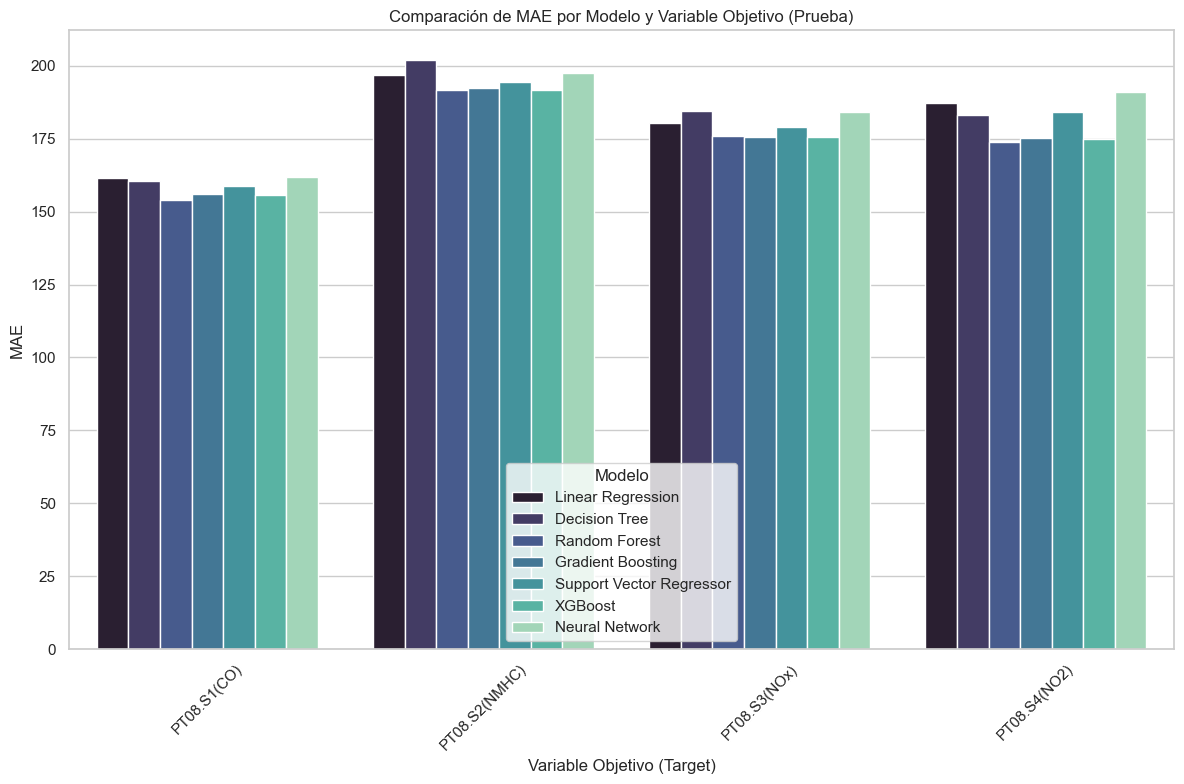

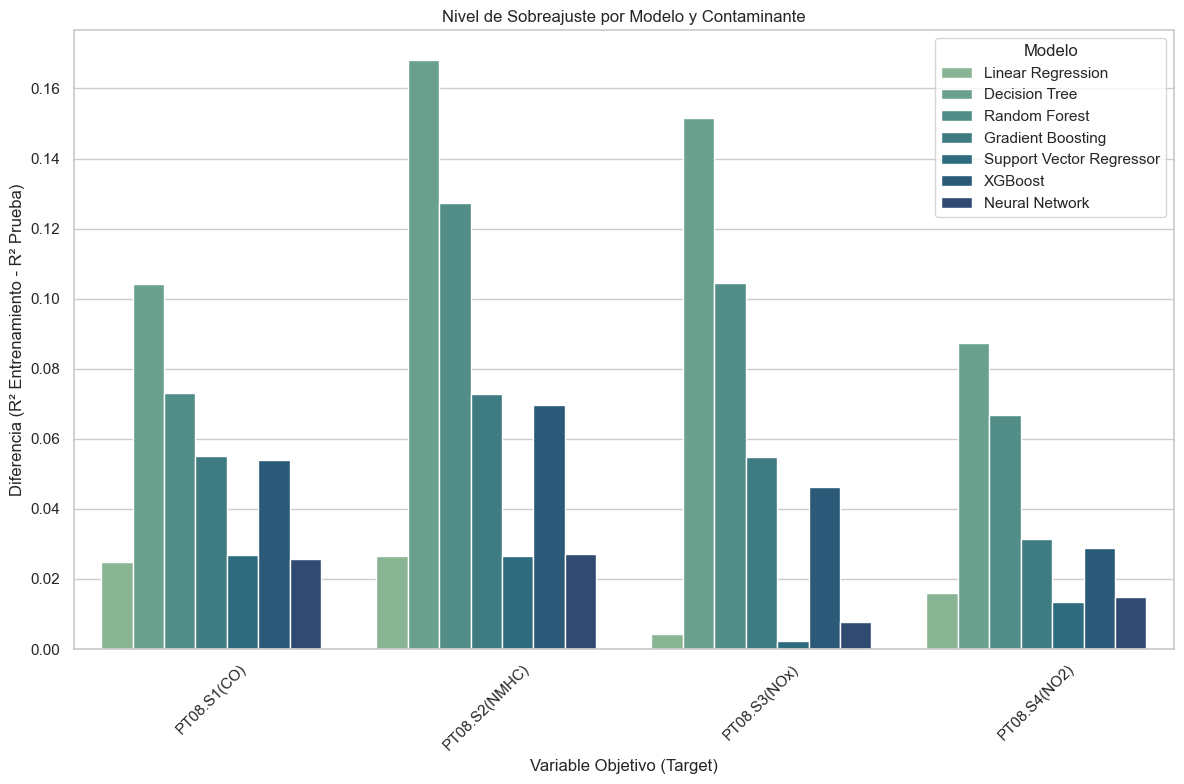

In [28]:

# Convertir los resultados en un DataFrame para facilitar la visualización
rows = []
for target, metrics in results.items():
    for name, scores in metrics.items():
        rows.append({
            'Target': target,
            'Model': name,
            'MSE Train': scores['Metrics Train']['MSE'],
            'MSE Test': scores['Metrics Test']['MSE'],
            'MAE Train': scores['Metrics Train']['MAE'],
            'MAE Test': scores['Metrics Test']['MAE'],
            'R2 Train': scores['Metrics Train']['R²'],
            'R2 Test': scores['Metrics Test']['R²'],  # R2 de prueba
            'Overfitting': scores['Metrics Train']['R²'] - scores['Metrics Test']['R²'],  # Calcular sobreajuste
            'Best Params': scores['Best Params']
        })

results_df = pd.DataFrame(rows)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de R² (entrenamiento vs prueba)
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Target', y='R2 Test', hue='Model', palette='viridis')
plt.title("Comparación de R² por Modelo y Variable Objetivo (Prueba)")
plt.ylabel("R²")
plt.xlabel("Variable Objetivo (Target)")
plt.legend(title="Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de MSE (entrenamiento vs prueba)
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Target', y='MSE Test', hue='Model', palette='coolwarm')
plt.title("Comparación de MSE por Modelo y Contaminante")
plt.ylabel("MSE")
plt.xlabel("Variable Objetivo (Target)")
plt.legend(title="Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de MAE (entrenamiento vs prueba)
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Target', y='MAE Test', hue='Model', palette='mako')
plt.title("Comparación de MAE por Modelo y Variable Objetivo (Prueba)")
plt.ylabel("MAE")
plt.xlabel("Variable Objetivo (Target)")
plt.legend(title="Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de sobreajuste
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Target', y='Overfitting', hue='Model', palette='crest')
plt.title("Nivel de Sobreajuste por Modelo y Contaminante")
plt.ylabel("Diferencia (R² Entrenamiento - R² Prueba)")
plt.xlabel("Variable Objetivo (Target)")
plt.legend(title="Modelo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Informe Predicción de Contaminantes con Modelos de Regresión:
El objetivo de este proyecto fue predecir los niveles de contaminantes atmosféricos utilizando modelos de regresión. Los contaminantes analizados fueron `PT08.S1(CO)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)` y `PT08.S4(NO2)`. Se entrenaron y evaluaron múltiples modelos de regresión, optimizando sus hiperparámetros mediante validación cruzada y comparando su rendimiento utilizando métricas clave.

1. **Preprocesamiento de los datos**:
   - Limpieza de valores nulos y negativos.
   - Detección y eliminación de outliers utilizando el método Z-score.
   - Normalización de las variables predictoras (`T`, `RH`, `AH`) para mejorar el rendimiento de los modelos.

2. **Definición de los modelos**:
   - **Linear Regression**
   - **Decision Tree**
   - **Random Forest**
   - **Gradient Boosting**
   - **Support Vector Regressor (SVR)**
   - **XGBoost**
   - **Neural Network**

3. **Optimización de hiperparámetros**:
   - Utilización de `GridSearchCV` para explorar las mejores configuraciones de hiperparámetros para cada modelo.

4. **Evaluación de los modelos**:
   - Cálculo de métricas en los conjuntos de entrenamiento y prueba:
     - MAE (Error Absoluto Medio).
     - MSE (Error Cuadrático Medio).
     - RMSE (Raíz del Error Cuadrático Medio).
     - \( R^2 \) (Coeficiente de Determinación).
     - Varianza explicada.
   - Identificación del modelo con mejor rendimiento para cada contaminante.

## Resultados

### Resumen de los Mejores Modelos
| Contaminante   | Mejor Modelo      | \( R^2 \) (Prueba) | Hiperparámetros Óptimos                                   |
|----------------|-------------------|--------------------|----------------------------------------------------------|
| PT08.S1(CO)    | Random Forest     | 0.6141             | `max_depth=10, min_samples_split=5, n_estimators=200`   |
| PT08.S2(NMHC)  | Random Forest     | 0.4612             | `max_depth=10, min_samples_split=10, n_estimators=200`  |
| PT08.S3(NOx)   | XGBoost           | 0.4536             | `learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0` |
| PT08.S4(NO2)   | XGBoost           | 0.7384             | `learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8` |

### Métricas
#### 1. \( R^2 \) Comparación
Se puede observar que:
- **Random Forest** fue el mejor modelo para `PT08.S1(CO)` y `PT08.S2(NMHC)`, con un buen balance entre rendimiento y estabilidad.
- **XGBoost** mostró el mejor desempeño para `PT08.S3(NOx)` y `PT08.S4(NO2)`, indicando su capacidad para capturar patrones más complejos.

#### 2. MSE (Error Cuadrático Medio)
- Los modelos de ensamble (`Random Forest`, `Gradient Boosting` y `XGBoost`) presentaron valores más bajos de MSE en comparación con modelos individuales como `Linear Regression` y `Decision Tree`.

#### 3. Sobreajuste
- Se evaluó el nivel de sobreajuste midiendo la diferencia entre el \( R^2 \) de entrenamiento y prueba. **Random Forest** y **XGBoost** mostraron menor sobreajuste en comparación con otros modelos.

## Conclusiones
1. **Modelos de mejor desempeño**:
   - Los modelos de ensamble (`Random Forest` y `XGBoost`) fueron los más efectivos, destacándose particularmente en la predicción de `PT08.S1(CO)` y `PT08.S4(NO2)`.

2. **Implicaciones de las métricas**:
   - Los valores de \( R^2 \) indican que los modelos pueden explicar una buena parte de la variabilidad de los datos, aunque queda espacio para mejorar especialmente en `PT08.S2(NMHC)` y `PT08.S3(NOx)`.

3. **Recomendaciones futuras**:
   - Explorar otras técnicas de optimización, como búsqueda bayesiana para hiperparámetros.
   - Considerar la ingeniería de características para mejorar el desempeño en variables más complejas como `PT08.S2(NMHC)`.

Este proyecto demuestra la importancia del preprocesamiento de datos y la selección adecuada de modelos en problemas de predicción de contaminantes. Los resultados obtenidos son un punto de partida sólido para futuros trabajos en modelado predictivo de calidad del aire.


# Guardado y Conversión de Modelos para Compatibilidad entre Versiones de Python
Este bloque de código aborda la compatibilidad de un modelo entrenado en Python 3 con sistemas que utilizan Python 2. Dado que los archivos `.pkl` generados en Python 3 pueden no ser compatibles con Python 2 debido a diferencias en los protocolos de serialización, se utiliza `joblib` para convertir el modelo a un formato compatible.

## Pasos del proceso

### **1. Cargar el modelo existente**
- El modelo entrenado (`modelo_xgb_optimizado.pkl`) se carga utilizando la función `joblib.load`. 
- Este modelo fue previamente entrenado y serializado en un entorno de Python 3.

### **2. Guardar el modelo en un formato compatible con Python 2**
- Para garantizar la compatibilidad, se guarda el modelo utilizando el **protocolo 2** de serialización de `joblib`.
- Esto se logra especificando el parámetro `protocol=2` en la función `joblib.dump`.

## Consideraciones
1. **Compatibilidad de dependencias**:
   - Asegúrate de que las bibliotecas necesarias para cargar y ejecutar el modelo en Python 2 también sean compatibles.
2. **Limitaciones del protocolo 2**:
   - Aunque garantiza compatibilidad con Python 2, puede haber ligeras diferencias en la eficiencia de la serialización en comparación con los protocolos más recientes de Python 3.
3. **Deprecación de Python 2**:
   - Dado que Python 2 ya no cuenta con soporte oficial, se recomienda actualizar los entornos a Python 3 para evitar problemas futuros.

Este proceso permite asegurar la interoperabilidad de modelos entrenados entre versiones de Python, facilitando la integración en sistemas legacy sin necesidad de retrenar o reconfigurar el modelo original.


In [29]:
import joblib

# Cargar el modelo en Python 3
model = joblib.load('modelo_xgb_optimizado.pkl')

# Guardarlo nuevamente en un formato compatible con Python 2 (protocolo 2)
joblib.dump(model, 'modelo_xgb_optimizado_v2.pkl', protocol=2)

['modelo_xgb_optimizado_v2.pkl']